# Reading CSV File

In [1]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Selecting Valid Labels & Cleaning Data

In [2]:
target=titanic['Survived']
target.fillna(method='ffill',inplace=True)
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [3]:
useful=titanic[['Pclass','Sex','Age']]


In [4]:
import numpy as np
AGEmean=useful['Age'].mean()
AGEmean

29.69911764705882

In [5]:
useful['Age'].fillna(AGEmean,inplace=True)
useful['Sex'].fillna(method='ffill',inplace=True)
useful['Pclass'].fillna(method='bfill',inplace=True)
useful.head()


/var/folders/95/_c9yks214277vmq3dp_w15xw0000gn/T/ipykernel_38470/1276746791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful['Age'].fillna(AGEmean,inplace=True)
/var/folders/95/_c9yks214277vmq3dp_w15xw0000gn/T/ipykernel_38470/1276746791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful['Sex'].fillna(method='ffill',inplace=True)
/var/folders/95/_c9yks214277vmq3dp_w15xw0000gn/T/ipykernel_38470/1276746791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0


# Encoding Strings to Whole Numbers

In [6]:
from sklearn.preprocessing import LabelEncoder
EncSex=LabelEncoder()
useful['Sex']=EncSex.fit_transform(useful['Sex'])

/var/folders/95/_c9yks214277vmq3dp_w15xw0000gn/T/ipykernel_38470/642098121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful['Sex']=EncSex.fit_transform(useful['Sex'])


In [7]:
useful.head()

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [9]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Concatinating DataFrames of Pure & Cleansed Data

In [11]:

frame=[useful,target]
pure_data=pd.concat(frame,join='outer',axis=1)
pure_data.head()

,Pclass,Sex,Age,Survived
0,3,1,22.0,0
1,1,0,38.0,1
2,3,0,26.0,1
3,1,0,35.0,1
4,3,1,35.0,0


# Studying Correlations between attributes

In [12]:
corr_matrix=pure_data.corr()
corr_matrix['Survived'].sort_values(ascending=False)
pure_data['Sex'].value_counts()


1    577
0    314
Name: Sex, dtype: int64

array([[<AxesSubplot: xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot: xlabel='Sex', ylabel='Pclass'>,
        <AxesSubplot: xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot: xlabel='Survived', ylabel='Pclass'>],
       [<AxesSubplot: xlabel='Pclass', ylabel='Sex'>,
        <AxesSubplot: xlabel='Sex', ylabel='Sex'>,
        <AxesSubplot: xlabel='Age', ylabel='Sex'>,
        <AxesSubplot: xlabel='Survived', ylabel='Sex'>],
       [<AxesSubplot: xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot: xlabel='Sex', ylabel='Age'>,
        <AxesSubplot: xlabel='Age', ylabel='Age'>,
        <AxesSubplot: xlabel='Survived', ylabel='Age'>],
       [<AxesSubplot: xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot: xlabel='Sex', ylabel='Survived'>,
        <AxesSubplot: xlabel='Age', ylabel='Survived'>,
        <AxesSubplot: xlabel='Survived', ylabel='Survived'>]],
      dtype=object)

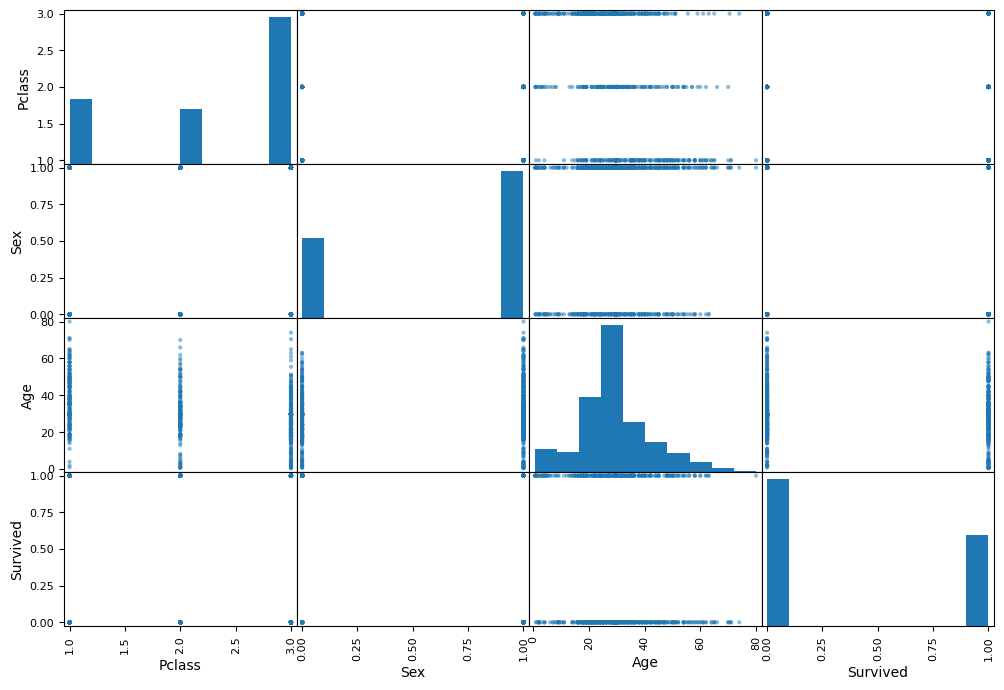

In [13]:
from pandas.plotting import scatter_matrix
attributes=['Pclass','Sex','Age','Survived']
scatter_matrix(pure_data[attributes],figsize=(12,8))


# Splitting Train & Test Data with Strstified Shuffle Split Method

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(pure_data,pure_data[['Survived','Sex']]):
    strat_train_set=pure_data.loc[train_index]
    strat_test_set=pure_data.loc[test_index]

# Importing Decision Tree Classifier 

In [8]:
from sklearn import tree
model=tree.DecisionTreeClassifier()


In [15]:
train=strat_train_set.drop('Survived',axis=1)
target=strat_train_set['Survived'].copy()
model.fit(train,target)

DecisionTreeClassifier()

In [16]:
data=train.iloc[:5]
final=target.iloc[:5]

# Creating Pipeline 

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
myp=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])
prep_data=myp.fit_transform(data)

In [30]:
predict=model.predict(prep_data)
print(predict)

[0 0 0 0 0]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [26]:
e=np.array([[3,0,33]])

In [31]:
pre=model.predict(e)
print(pre)

[1]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Mean Squared Error for Decision Tree Classifier

In [24]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(final,predict)
mse=np.sqrt(mse)

In [25]:
mse

0.6324555320336759

# Model Deployment

In [32]:
from joblib import dump,load
dump (model,'Survived titanic ?.joblib')

['Survived titanic ?.joblib']

Thank you :)